0)Intro

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")

df = pd.read_csv("/Users/markrudolf/VSCode/Seoul_Bike_Demand/dds_group_16/SeoulBikeData.csv", encoding="latin1")

df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")
df["DayOfWeek"] = df["Date"].dt.dayofweek
df["Month"] = df["Date"].dt.month


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),DayOfWeek,Month
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2018-05-31 23:59:59.999999744,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,3.002740,6.526027
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2018-03-02 00:00:00,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,1.000000,4.000000
50%,2018-06-01 00:00:00,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,3.000000,7.000000
75%,2018-08-31 00:00:00,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,5.000000,10.000000
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,6.000000,12.000000
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,1.998056,3.448048


In [6]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,DayOfWeek,Month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12


1)Time-Based Visualizations

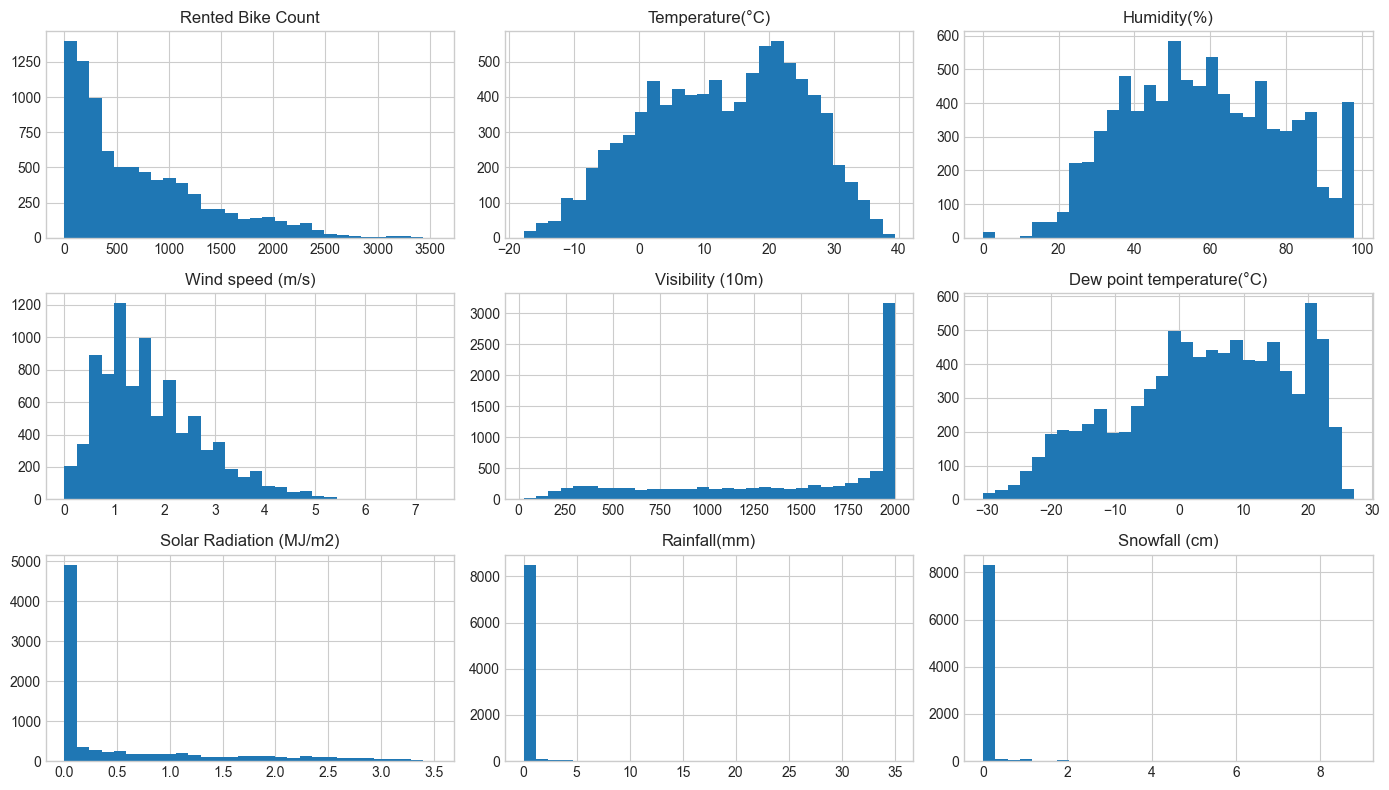

In [5]:
num_cols = [
    "Rented Bike Count",
    "Temperature(°C)",
    "Humidity(%)",
    "Wind speed (m/s)",
    "Visibility (10m)",
    "Dew point temperature(°C)",
    "Solar Radiation (MJ/m2)",
    "Rainfall(mm)",
    "Snowfall (cm)"
]

df[num_cols].hist(bins=30, figsize=(14, 8))
plt.tight_layout()
plt.show()


1. Right-skewed demand - high demand hours occur infrequently
2. Roughly normal distribution of temperatures and humidity, also dew point temperature
3. Right-skewed wind speed - tipycally low wind speeds
4. High visibility
5. Mostly zero solar radiation
6. Rainfall - vast majority of hours with no rainfall
7. Snowfall - almost always zero


#Correlation matrix

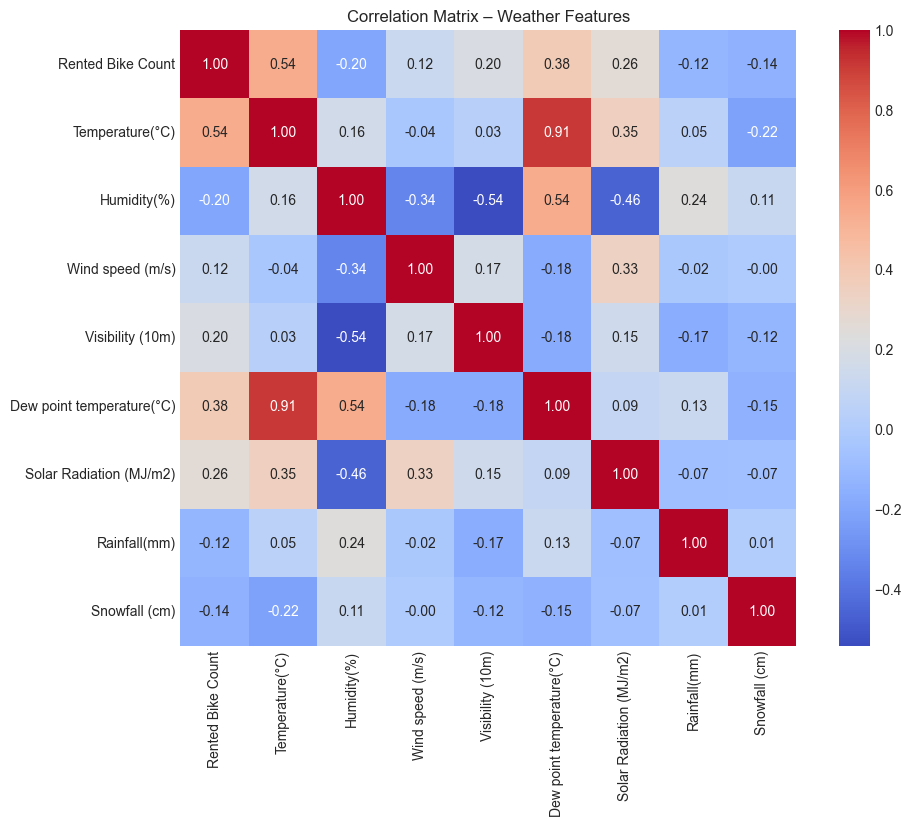

In [6]:
plt.figure(figsize=(11, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", square=True, fmt=".2f")
plt.title("Correlation Matrix – Weather Features")
plt.show()


Strongest positive correlations with bike rentals are temperature (0.54) and dew point temperature (0.38), which indicates that warmer weather increases demand.
Rainfall and snowfall show negative correlations with rentals - indicating reduced use
Correlation between temperature and dew point temperature is extremely high (0.91), suggesting redundancy between them

#average usage by hours

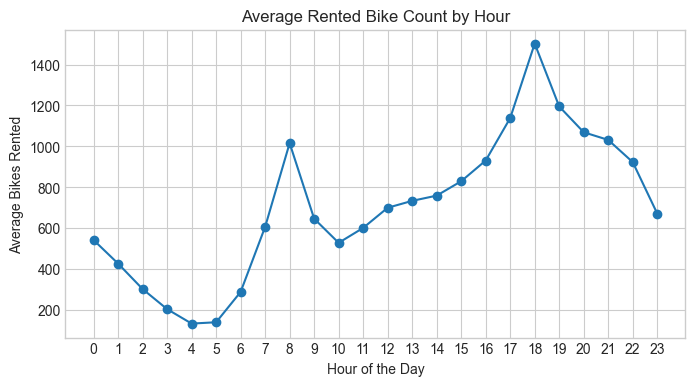

In [7]:
hourly = df.groupby("Hour")["Rented Bike Count"].mean()

plt.figure(figsize=(8, 4))
hourly.plot(marker="o")
plt.xticks(range(0, 24))
plt.title("Average Rented Bike Count by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Bikes Rented")
plt.grid(True)
plt.show()


Two peaks: 8am and 6pm - morning and evening commuting times
Lowest usage at night

#seasonal boxplot

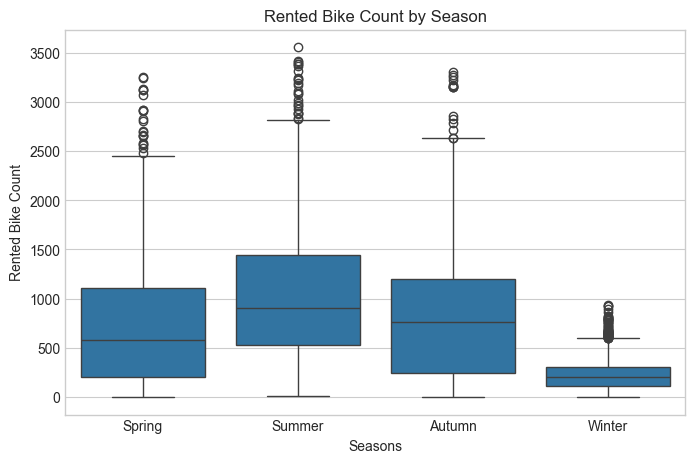

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x="Seasons",
    y="Rented Bike Count",
    order=["Spring", "Summer", "Autumn", "Winter"]
)
plt.title("Rented Bike Count by Season")
plt.show()


Highest median in summer, then spring and autumn, lowest in the winter -> strong seasonality
Summer contains the most extreme high-demand outliers

#holiday vs non-holiday

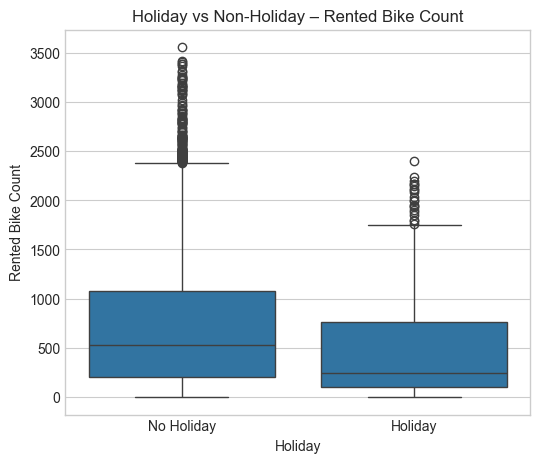

In [9]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x="Holiday", y="Rented Bike Count")
plt.title("Holiday vs Non-Holiday – Rented Bike Count")
plt.show()


Rentals tend to be lower on holidays compared to normal days

#daily time series

In [10]:
daily = df.groupby("Date")["Rented Bike Count"].sum().reset_index()

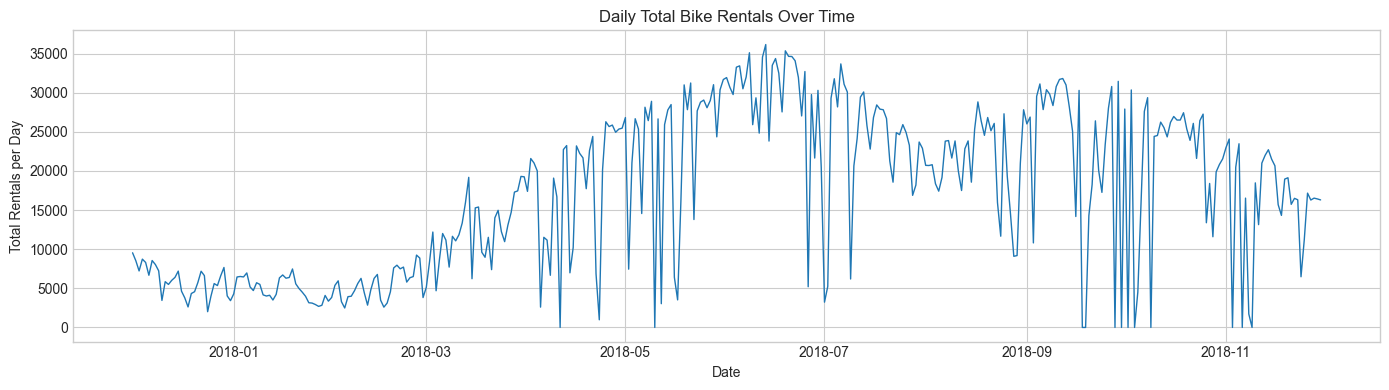

In [11]:
plt.figure(figsize=(14, 4))
plt.plot(daily["Date"], daily["Rented Bike Count"], linewidth=1)
plt.title("Daily Total Bike Rentals Over Time")
plt.xlabel("Date")
plt.ylabel("Total Rentals per Day")
plt.tight_layout()
plt.show()


Clear seasonal trend - increase from winter into summer, peak around mid-year, decline again
Daily values are highly variable

#scatterplot temperature vs bike count

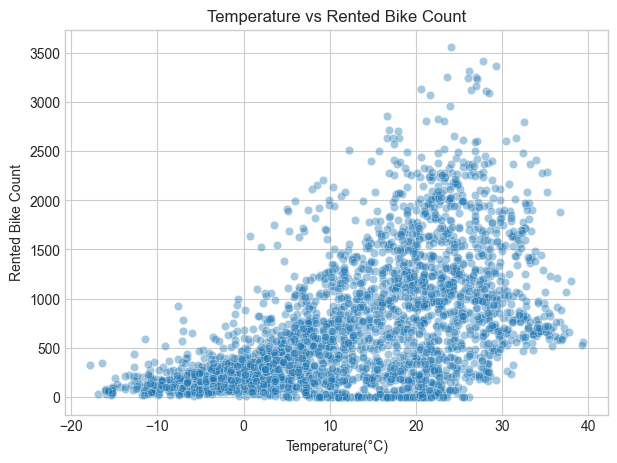

In [12]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df.sample(3000, random_state=42),
    x="Temperature(°C)",
    y="Rented Bike Count",
    alpha=0.4
)
plt.title("Temperature vs Rented Bike Count")
plt.show()


Clear positive relationship: higher temperatures generally lead to more rentals, but not perfeclty linear (slows down after around 30 degrees)

#scatterplot rainfall vs bike count

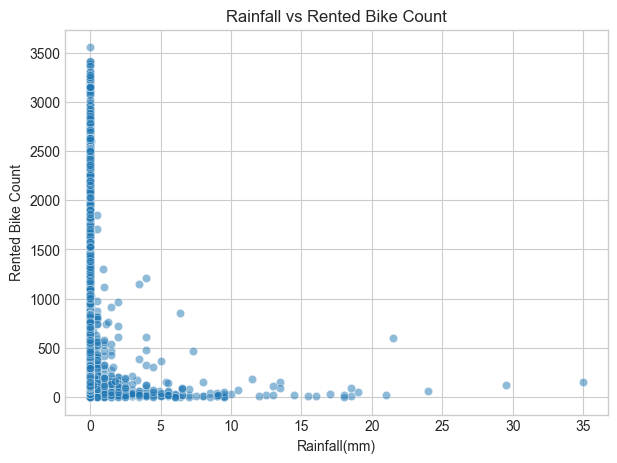

In [13]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df,
    x="Rainfall(mm)",
    y="Rented Bike Count",
    alpha=0.5
)
plt.title("Rainfall vs Rented Bike Count")
plt.show()


No rainfall - high rental, even small amounts of rainfall -> significantly reduce demand